# Song Clustering Using K-Means
<br>

#### what is K-Means ?
K-Means is an unsupervised learning algorithm (meaning there are no target labels) that allows you to identify similar groups or clusters of data points within your data. The group based on their distance to the centroid (A centroid is just the mean (average) position of all points in a cluster).

**K-Means process** :

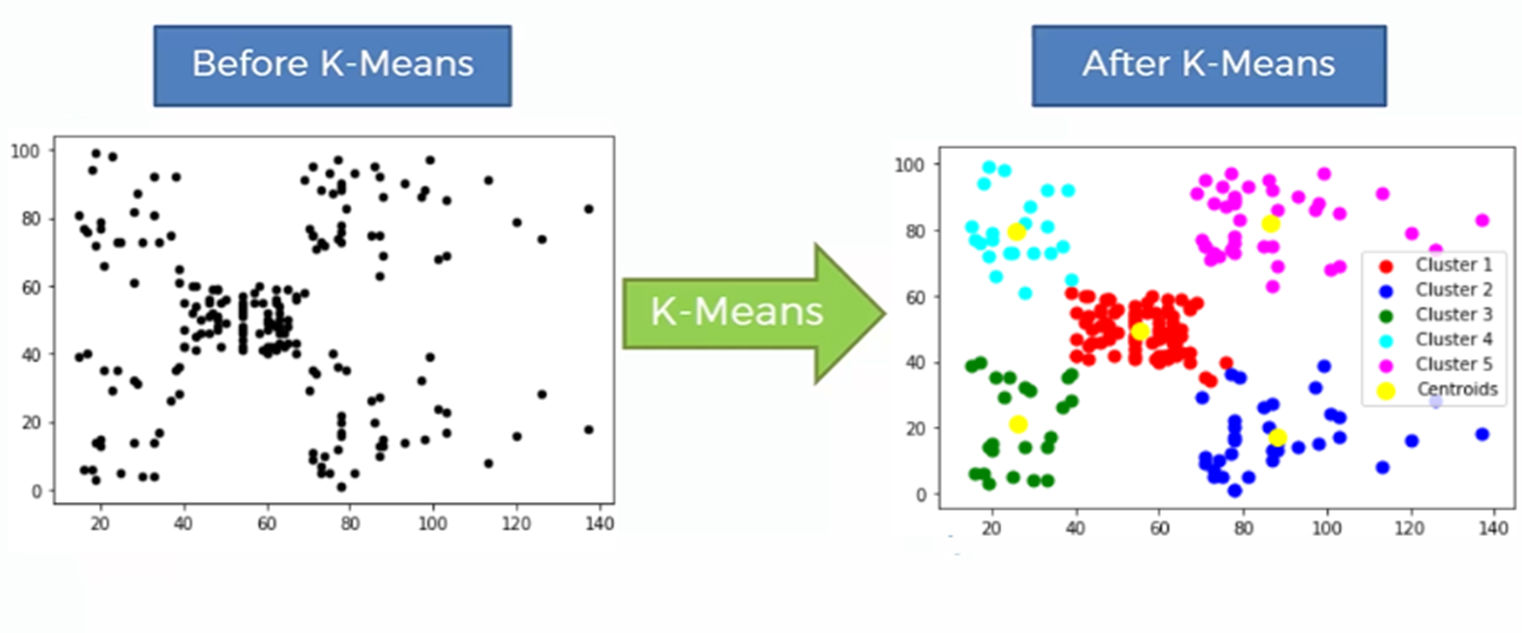

**Dataset description** :
SpotifyFeatures.csv
genre:the genre of the track;
artists_name:The list of artists credited for production of the track,
popularity: the popularity rate of the track,
danceability:The relative measurement of the track being danceable,
energy: The energy of a song - the higher the value, the more energtic,
liveness: The higher the value, the more likely the song is a live recording,
valence : The higher the value, the more positive mood for the song,
loudness :  the louder the song,
liveness : The higher the value, the more likely the song is a live recording,
instrumentalness: The relative ratio of the track being instrumental,
tempo : is the speed or pace of a given piece,

## Data Preprocessing

**import library**
-for anlalyzing data we use pandas and numpy library,
-visualizing data we use matplotlib and seaborn,
-for machine learning mostly we use sklearn.


In [1]:
#data analysis 
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
from yellowbrick.cluster import KElbowVisualizer

**understanding data**
To begin this step, We use the info() function to get a quick and dirty overview of variable datatypes and describe() to get some basic statistical.


In [2]:
df=pd.read_csv('SpotifyFeatures.csv', error_bad_lines=False)
df.head()

b'Skipping line 45704: expected 18 fields, saw 21\nSkipping line 45770: expected 18 fields, saw 21\nSkipping line 45969: expected 18 fields, saw 21\nSkipping line 46646: expected 18 fields, saw 21\nSkipping line 46862: expected 18 fields, saw 21\nSkipping line 47073: expected 18 fields, saw 21\nSkipping line 47355: expected 18 fields, saw 21\nSkipping line 47848: expected 18 fields, saw 21\nSkipping line 47956: expected 18 fields, saw 21\nSkipping line 48213: expected 18 fields, saw 21\nSkipping line 48346: expected 18 fields, saw 21\nSkipping line 48362: expected 18 fields, saw 21\nSkipping line 49361: expected 18 fields, saw 21\nSkipping line 49892: expected 18 fields, saw 21\nSkipping line 50282: expected 18 fields, saw 21\nSkipping line 50634: expected 18 fields, saw 21\nSkipping line 51071: expected 18 fields, saw 21\nSkipping line 51118: expected 18 fields, saw 21\nSkipping line 51728: expected 18 fields, saw 21\nSkipping line 51764: expected 18 fields, saw 21\nSkipping line 5185

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence;;;
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,0.611,0.389,99373.0,0.91,0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814;;;
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,0.246,0.590,137373.0,0.737,0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816;;;
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,0.952,0.663,170267.0,0.131,0,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368;;;
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,0.703,0.240,152427.0,0.326,0,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227;;;
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.950,0.331,82625.0,0.225,0.123,F,0.202,-21.15,Major,0.0456,140.576,4/4,0.39;;;


In [3]:
df.shape

(232702, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232702 entries, 0 to 232701
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232702 non-null  object 
 1   artist_name       213205 non-null  object 
 2   track_name        213205 non-null  object 
 3   track_id          213205 non-null  object 
 4   popularity        213205 non-null  float64
 5   acousticness      213205 non-null  float64
 6   danceability      213205 non-null  float64
 7   duration_ms       213205 non-null  float64
 8   energy            213205 non-null  object 
 9   instrumentalness  213205 non-null  object 
 10  key               213205 non-null  object 
 11  liveness          213205 non-null  object 
 12  loudness          213205 non-null  object 
 13  mode              213205 non-null  object 
 14  speechiness       213205 non-null  object 
 15  tempo             213205 non-null  object 
 16  time_signature    21

In [5]:
df.describe()

,popularity,acousticness,danceability,duration_ms
count,213205.000000,2.132050e+05,213205.000000,2.132050e+05
mean,42.357004,6.537387e+01,11.099715,2.325594e+05
std,17.677024,5.560133e+03,1657.559577,1.127740e+05
min,0.000000,0.000000e+00,0.008660,0.000000e+00
25%,31.000000,3.190000e-02,0.457000,1.838670e+05
50%,44.000000,1.980000e-01,0.582000,2.200530e+05
75%,55.000000,6.370000e-01,0.698000,2.631460e+05
max,100.000000,1.237960e+06,451067.000000,5.488000e+06


**Data Cleaning**
is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.
This data is usually not necessary or helpful when it comes to analyzing data because it may hinder the process or provide inaccurate results
<br>
there are 3 problem
1. missing value
2. there are problem in  data, we must delete ";;;" so we can convert it into numeric data type
3. the data type is object so we can't procces it, we must convert it into numeric data type like float or integer


In [6]:
df.isna().sum()

genre                   0
artist_name         19497
track_name          19497
track_id            19497
popularity          19497
acousticness        19497
danceability        19497
duration_ms         19497
energy              19497
instrumentalness    19497
key                 19497
liveness            19497
loudness            19497
mode                19497
speechiness         19497
tempo               19497
time_signature      19541
valence;;;          19552
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence;;;          0
dtype: int64

In [9]:
df['valence'] = df['valence;;;'].astype(str)

In [10]:
df['valence'] = df['valence;;;'].apply(lambda a: str(a).replace(';;;',''))
df['valence'] = df['valence'].apply(lambda a: str(a).replace(';;',''))
df['valence'] = df['valence'].apply(lambda a: str(a).replace(';',''))
df['valence'] = df['valence'].apply(lambda a: str(a).replace('"',''))

In [11]:
df=df.drop(columns='valence;;;')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213150 entries, 0 to 232701
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             213150 non-null  object 
 1   artist_name       213150 non-null  object 
 2   track_name        213150 non-null  object 
 3   track_id          213150 non-null  object 
 4   popularity        213150 non-null  float64
 5   acousticness      213150 non-null  float64
 6   danceability      213150 non-null  float64
 7   duration_ms       213150 non-null  float64
 8   energy            213150 non-null  object 
 9   instrumentalness  213150 non-null  object 
 10  key               213150 non-null  object 
 11  liveness          213150 non-null  object 
 12  loudness          213150 non-null  object 
 13  mode              213150 non-null  object 
 14  speechiness       213150 non-null  object 
 15  tempo             213150 non-null  object 
 16  time_signature    21

In [13]:
df['time_signature'].unique()

array(['4/4', '5/4', '3/4', '1/4', '0/4'], dtype=object)

In [14]:
cleanup = {"mode":     {"Major": 1, "Minor": 2},
                "time_signature": {"0/4":0,"1/4": 1,"3/4":3,"4/4":4,"5/4":5}}
df=df.replace(cleanup)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213150 entries, 0 to 232701
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             213150 non-null  object 
 1   artist_name       213150 non-null  object 
 2   track_name        213150 non-null  object 
 3   track_id          213150 non-null  object 
 4   popularity        213150 non-null  float64
 5   acousticness      213150 non-null  float64
 6   danceability      213150 non-null  float64
 7   duration_ms       213150 non-null  float64
 8   energy            213150 non-null  object 
 9   instrumentalness  213150 non-null  object 
 10  key               213150 non-null  object 
 11  liveness          213150 non-null  object 
 12  loudness          213150 non-null  object 
 13  mode              213150 non-null  int64  
 14  speechiness       213150 non-null  object 
 15  tempo             213150 non-null  object 
 16  time_signature    21

In [16]:
df[['energy','instrumentalness','tempo','speechiness','liveness','loudness','mode','time_signature','valence']] = df[['energy','instrumentalness','tempo','speechiness','liveness','loudness','mode','time_signature','valence']].apply(pd.to_numeric, axis = 1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213150 entries, 0 to 232701
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             213150 non-null  object 
 1   artist_name       213150 non-null  object 
 2   track_name        213150 non-null  object 
 3   track_id          213150 non-null  object 
 4   popularity        213150 non-null  float64
 5   acousticness      213150 non-null  float64
 6   danceability      213150 non-null  float64
 7   duration_ms       213150 non-null  float64
 8   energy            213150 non-null  float64
 9   instrumentalness  213150 non-null  float64
 10  key               213150 non-null  object 
 11  liveness          213150 non-null  float64
 12  loudness          213150 non-null  float64
 13  mode              213150 non-null  float64
 14  speechiness       213150 non-null  float64
 15  tempo             213150 non-null  float64
 16  time_signature    21

In [19]:
df.reset_index(inplace=True)

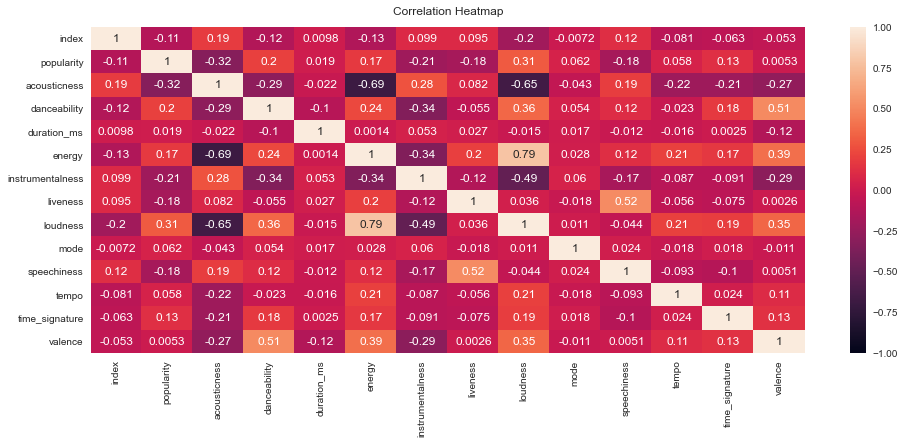

In [20]:
df_par=df.drop(columns=['genre','artist_name','track_name','track_id','key','popularity'])
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [21]:
df_par.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213150 entries, 0 to 213149
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             213150 non-null  int64  
 1   acousticness      213150 non-null  float64
 2   danceability      213150 non-null  float64
 3   duration_ms       213150 non-null  float64
 4   energy            213150 non-null  float64
 5   instrumentalness  213150 non-null  float64
 6   liveness          213150 non-null  float64
 7   loudness          213150 non-null  float64
 8   mode              213150 non-null  float64
 9   speechiness       213150 non-null  float64
 10  tempo             213150 non-null  float64
 11  time_signature    213150 non-null  float64
 12  valence           213150 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 21.1 MB


<br>

### Data Transformation
standardization is used because it relates to PCA(Principan Component Analysis)

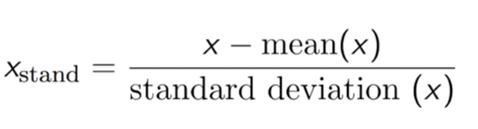

standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with
μ=0 and σ=1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213150 entries, 0 to 232701
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             213150 non-null  object 
 1   artist_name       213150 non-null  object 
 2   track_name        213150 non-null  object 
 3   track_id          213150 non-null  object 
 4   popularity        213150 non-null  float64
 5   acousticness      213150 non-null  float64
 6   danceability      213150 non-null  float64
 7   duration_ms       213150 non-null  float64
 8   energy            213150 non-null  float64
 9   instrumentalness  213150 non-null  float64
 10  key               213150 non-null  object 
 11  liveness          213150 non-null  float64
 12  loudness          213150 non-null  float64
 13  mode              213150 non-null  float64
 14  speechiness       213150 non-null  float64
 15  tempo             213150 non-null  float64
 16  time_signature    21

In [22]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df_par)

<br>



**PCA**
<br>
Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.
<br>
So, the idea is 13-dimensional data gives you 13 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on, until having cumsum = 1(total).
<br>




</br>

In [23]:
pca = PCA()
pca.fit(X_std)
evr = pca.explained_variance_ratio_
evr


array([0.25674895, 0.13215634, 0.09595452, 0.08131217, 0.07510566,
       0.07196435, 0.06659212, 0.06229271, 0.05361172, 0.03955044,
       0.03129261, 0.02365603, 0.00976237])

evr shows how much variance is explained by each of the fourteen features


In [24]:
evr.cumsum()

array([0.25674895, 0.38890529, 0.48485982, 0.56617198, 0.64127765,
       0.713242  , 0.77983412, 0.84212683, 0.89573855, 0.93528899,
       0.9665816 , 0.99023763, 1.        ])


**visualization of explained variance ratio**
<br>

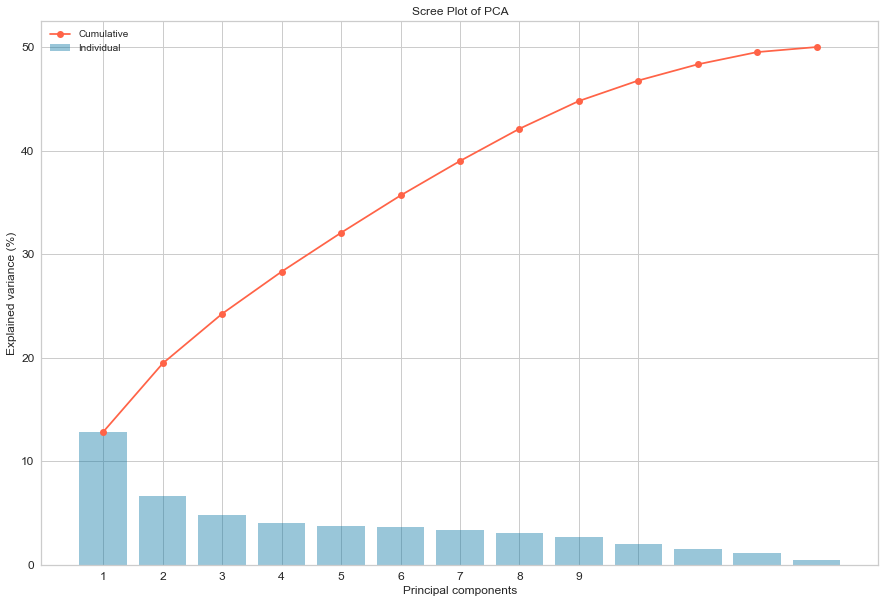

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(13, 8))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, 
        label='Individual', axes=ax, alpha=0.4)
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum(), 
         label='Cumulative', color='tomato', axes=ax, marker='o')

ax.set_xticks(range(0,10))
ax.set_xticklabels(range(1,10), fontsize=12)
ax.set_yticklabels(range(0,90,10), fontsize=12)

plt.title('Scree Plot of PCA', fontsize=12)
plt.ylabel('Explained variance (%)', fontsize=12)
plt.xlabel('Principal components', fontsize=12)
plt.legend()
plt.show()

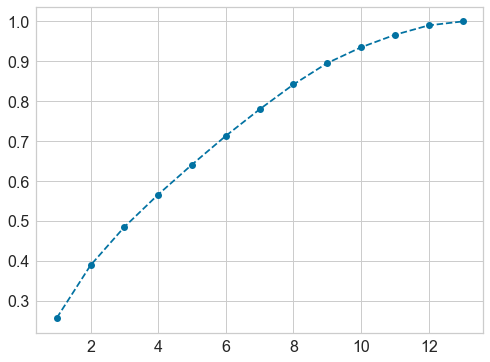

In [26]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1, len(df_par.columns)+1), evr.cumsum(), marker='o', linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [27]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Number of components:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Number of components: 8


The count of n_components ends when cumsum of the explained variance ratio achieve ~0.8 /80% of the evr cumsum.

<br>

K-Means Clustering
to determine the optimal number of clusters let's use elbow method with distortion( It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.)
<br>
“what exactly is the distortion?”. The distortion is the sum of square errors (SSE)
The “error” in this case is the difference between each data point coordinates and the centroid coordinates.
The SSE is simply:

All we’re doing is:
1. taking the difference between each data point and a centroid
2. squaring that difference
3. and summing it all up!

e.g.
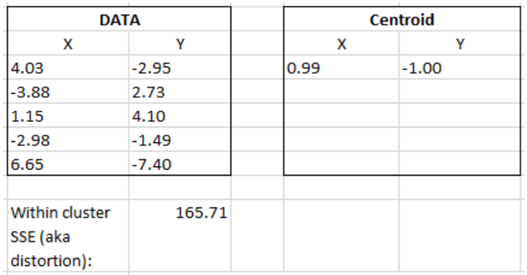

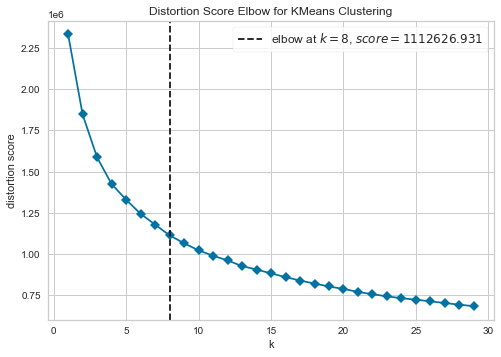

Optimal number of clusters: 8


In [28]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), k=(1,30), timings=False)
visualizer.fit(scores_pca)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)



In [29]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [30]:
df_seg_pca_kmeans = pd.concat([df_par.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,index,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,valence,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Cluster
0,0,0.611,0.389,99373.0,0.910,0.000,0.3460,-1.828,1.0,0.0525,...,0.814,-1.732683,-0.099151,0.543661,-1.949297,-0.763450,0.696276,-1.109965,0.826095,1
1,1,0.246,0.590,137373.0,0.737,0.000,0.1510,-5.559,2.0,0.0868,...,0.816,-1.912333,-0.854337,-0.164594,-0.169685,-1.973389,0.733613,-0.351597,1.379460,2
2,2,0.952,0.663,170267.0,0.131,0.000,0.1030,-13.879,2.0,0.0362,...,0.368,1.276052,-1.061094,-2.169206,1.533327,0.233585,1.335439,-1.931513,1.749131,4
3,3,0.703,0.240,152427.0,0.326,0.000,0.0985,-12.178,1.0,0.0395,...,0.227,1.424325,-1.282210,0.812188,-1.869555,-0.467323,1.175451,-1.232846,1.414206,4
4,4,0.950,0.331,82625.0,0.225,0.123,0.2020,-21.150,1.0,0.0456,...,0.390,2.612802,-0.658326,-0.730442,-1.703752,-0.415095,1.326802,-1.434863,1.413993,4


C:\Users\luthf\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


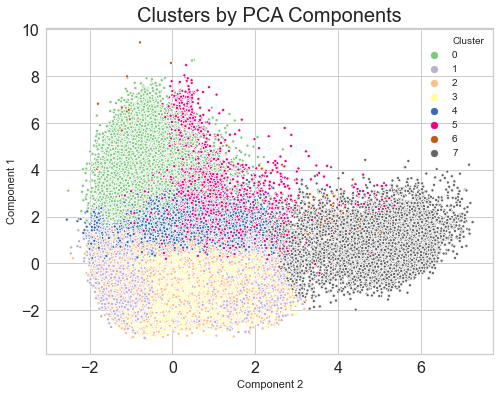

In [31]:
x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette ='Accent',s=10 )
plt.title('Clusters by PCA Components', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [32]:
df['Cluster'] = df_seg_pca_kmeans['Cluster']
df

,index,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Cluster
0,0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,0.61100,0.389,99373.0,0.910,0.000000,C#,0.3460,-1.828,1.0,0.0525,166.969,4.0,0.814,1
1,1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,0.24600,0.590,137373.0,0.737,0.000000,F#,0.1510,-5.559,2.0,0.0868,174.003,4.0,0.816,2
2,2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,0.95200,0.663,170267.0,0.131,0.000000,C,0.1030,-13.879,2.0,0.0362,99.488,5.0,0.368,4
3,3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,0.70300,0.240,152427.0,0.326,0.000000,C#,0.0985,-12.178,1.0,0.0395,171.758,4.0,0.227,4
4,4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.95000,0.331,82625.0,0.225,0.123000,F,0.2020,-21.150,1.0,0.0456,140.576,4.0,0.390,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213145,232697,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39.0,0.00384,0.687,326240.0,0.714,0.544000,D,0.0845,-10.626,1.0,0.0316,115.542,4.0,0.962,3
213146,232698,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38.0,0.03290,0.785,282447.0,0.683,0.000880,E,0.2370,-6.944,2.0,0.0337,113.830,4.0,0.969,2
213147,232699,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47.0,0.90100,0.517,166960.0,0.419,0.000000,D,0.0945,-8.282,1.0,0.1480,84.135,4.0,0.813,4
213148,232700,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44.0,0.26200,0.745,222442.0,0.704,0.000000,A,0.3330,-7.137,1.0,0.1460,100.031,4.0,0.489,3


In [33]:
df['Cluster'].value_counts()

3    54168
2    50979
1    37884
4    33114
0    16515
5    10994
7     9350
6      146
Name: Cluster, dtype: int64

In [34]:
avg  = df.groupby("Cluster",as_index=False).mean()
df=pd.DataFrame(avg)
df

,Cluster,index,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,161952.585892,30.516137,0.834921,0.272412,2.397237e+05,0.159025,0.745755,0.139973,-20.715065,1.439237,0.043812,100.798250,3.818892,0.118668
1,1,99067.805828,44.100465,0.089369,0.466278,2.464435e+05,0.787600,0.085269,0.260279,-5.703754,1.132642,0.091895,148.298281,3.963177,0.420087
2,2,107638.981110,47.509406,0.178180,0.656716,2.331351e+05,0.684470,0.078782,0.188175,-6.776913,2.000000,0.109010,117.440028,3.995096,0.547200
3,3,114481.037679,46.339610,0.176528,0.682482,2.182934e+05,0.690100,0.029307,0.176008,-6.671343,1.000000,0.096982,111.118080,3.995643,0.624265
4,4,112911.644531,40.027662,0.643785,0.551470,2.296588e+05,0.356894,0.164503,0.160514,-11.771937,1.185178,0.067694,112.082445,4.029957,0.377780
5,5,118621.167182,35.741041,0.628858,0.444512,2.270934e+05,0.351181,0.176132,0.175857,-12.145716,1.266964,0.071062,122.332362,2.702383,0.328608
6,6,145836.315068,19.869863,0.712183,0.482515,2.641866e+06,0.426034,0.201044,0.329237,-14.532623,1.239726,0.486342,95.161130,3.671233,0.394857
7,7,172168.416257,21.668449,0.791120,0.558030,2.236059e+05,0.673742,0.001218,0.749016,-11.825158,1.319465,0.865473,97.513412,3.605668,0.409583


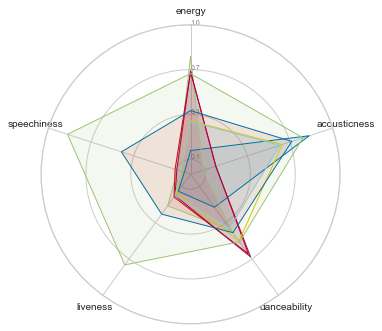

In [37]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

df['cluster']=[0,1,2,3,4,5,6,7]
df=df[['cluster','energy','acousticness','danceability','liveness','speechiness']]

# number of variable
categories=list(df)[1:]
N = len(categories)
categories

from math import pi
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.1,0.4,0.7,1], ["0.1","0.4","0.7","1.0"], color="grey", size=7)
plt.ylim(0,1)

# Ind1
values=df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Clustesr 2")
ax.fill(angles, values, 'm', alpha=0.1)

# Ind4
values=df.loc[3].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 3")
ax.fill(angles, values, 'k', alpha=0.1)

# Ind5
values=df.loc[4].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 4")
ax.fill(angles, values, 'w', alpha=0.1)

# Ind5
values=df.loc[5].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 5")
ax.fill(angles, values, 's', alpha=0.1)

# Ind6
values=df.loc[6].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 6")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind7
values=df.loc[7].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 7")
ax.fill(angles, values, 'x', alpha=0.1)


# Show the graph
plt.show()

## Conclusion

1. With PCA we can reduce data from 13 data variables into 8 components and can be used in K-Means modeling
2. With K-Means we can group the songs in the data into 8 clusters, based on the attributes they have such as acousticness, danceability, energy etc.

Moreover, using K-Means algorithm, we can create a song recommendation system based on the attributes that each variable has.